In [1]:
import pandas as pd
merged_df = pd.read_csv('final_data.csv')

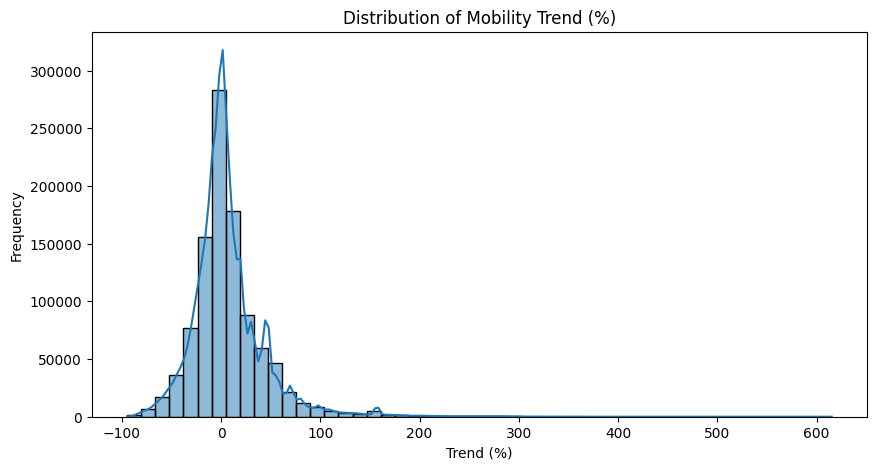

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Helps detect skewness, normality, and extreme variations in mobility.
plt.figure(figsize=(10,5))
sns.histplot(merged_df["trend"], bins=50, kde=True)
plt.title("Distribution of Mobility Trend (%)")
plt.xlabel("Trend (%)")
plt.ylabel("Frequency")
plt.show()

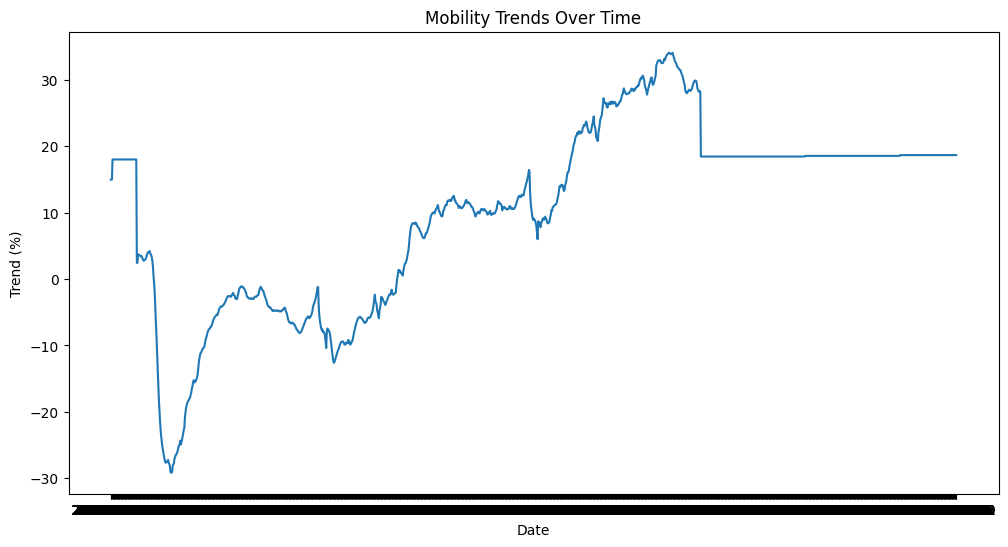

In [3]:
# Downsampling improves speed without losing trends.
# Shows how mobility responded to lockdowns & reopenings.
# Exclude non-numeric columns before applying mean()
numeric_cols = merged_df.select_dtypes(include=["number"]).columns

df_sample = merged_df.groupby("date")[numeric_cols].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sample, x="date", y="trend")
plt.title("Mobility Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Trend (%)")
plt.show()

What this visualization represents:
X-axis (Trend %): Represents changes in mobility percentage, which likely compares mobility patterns to a baseline (such as pre-pandemic levels).

Y-axis (Frequency): Represents the count of occurrences of a specific mobility trend percentage.

Histogram Bars: Show the distribution of mobility trends across different percentage ranges.

KDE Curve: Provides a smoothed estimate of the data distribution.

Key Observations:
Most data points are concentrated around 0%.

This means that in most cases, mobility trends did not change significantly from the baseline.

The distribution is highly skewed with a long right tail.

Some regions or time periods had extremely high mobility increases (200%–600%).

This could be due to specific locations experiencing significant reopening phases or data anomalies.

There is also a left tail (negative mobility trends).

Mobility decreased significantly in some regions, possibly due to lockdowns or restrictions.

Why this visualization is important:
Detecting mobility trends: Helps identify whether people moved less (negative trend) or more (positive trend) due to pandemic measures.

Checking normality: The sharp peak near zero suggests that most data points remain close to the baseline, but the long tail indicates outliers.

Identifying extreme variations: The high positive outliers suggest that in some cases, mobility spiked drastically.

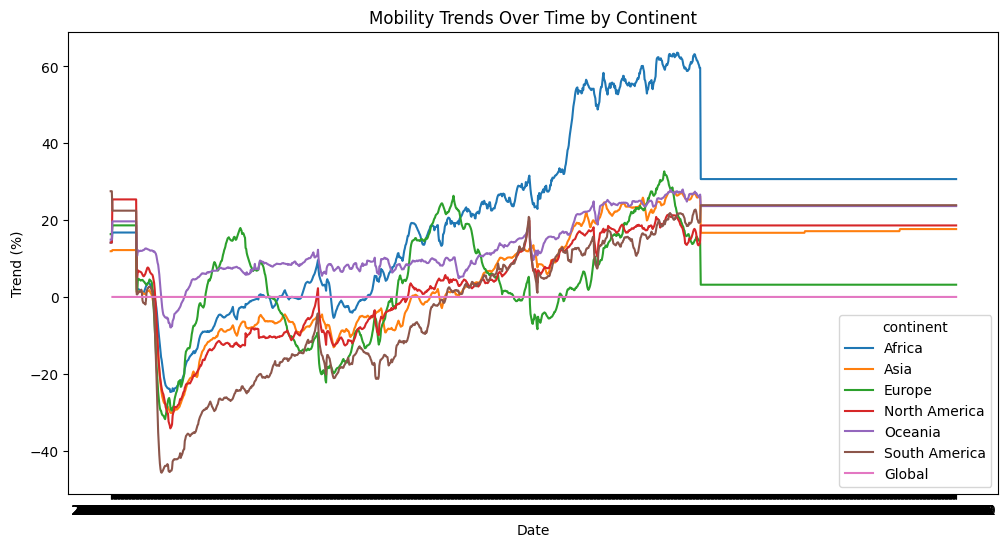

In [4]:
# Helps see which regions had stricter restrictions or faster recovery.
# Select only numeric columns for aggregation
df_sample = merged_df.groupby(["date", "continent"])[numeric_cols].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sample, x="date", y="trend", hue="continent")
plt.title("Mobility Trends Over Time by Continent")
plt.xlabel("Date")
plt.ylabel("Trend (%)")
plt.show()

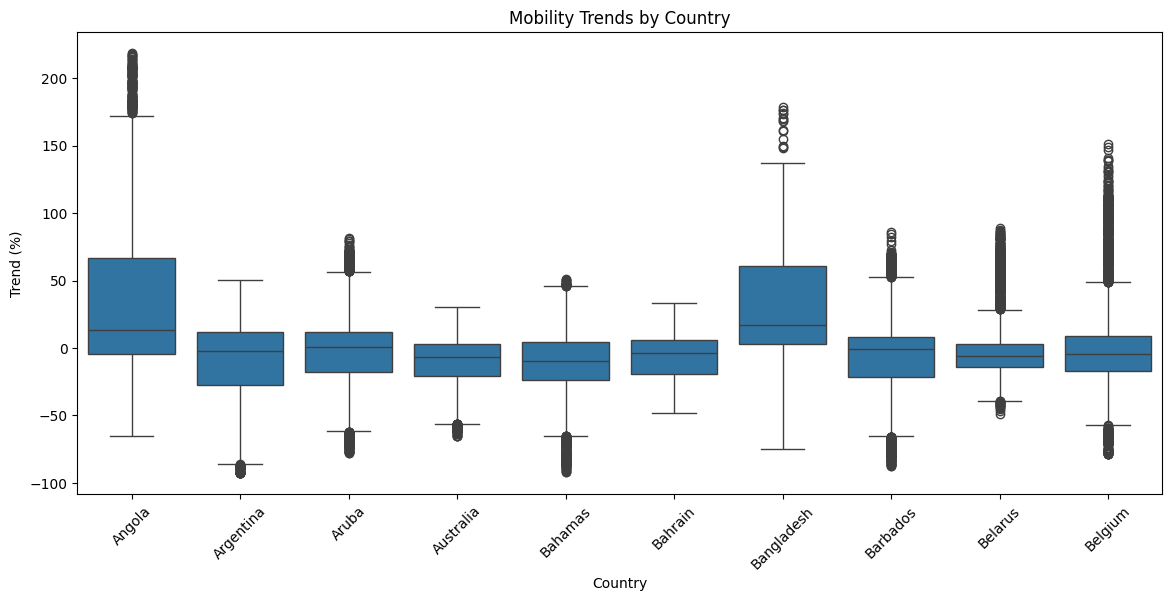

In [5]:
# Helps identify countries with extreme variations.
top_countries = merged_df["country"].value_counts().nlargest(10).index
df_filtered = merged_df[merged_df["country"].isin(top_countries)]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_filtered, x="country", y="trend")
plt.xticks(rotation=45)
plt.title("Mobility Trends by Country")
plt.xlabel("Country")
plt.ylabel("Trend (%)")
plt.show()

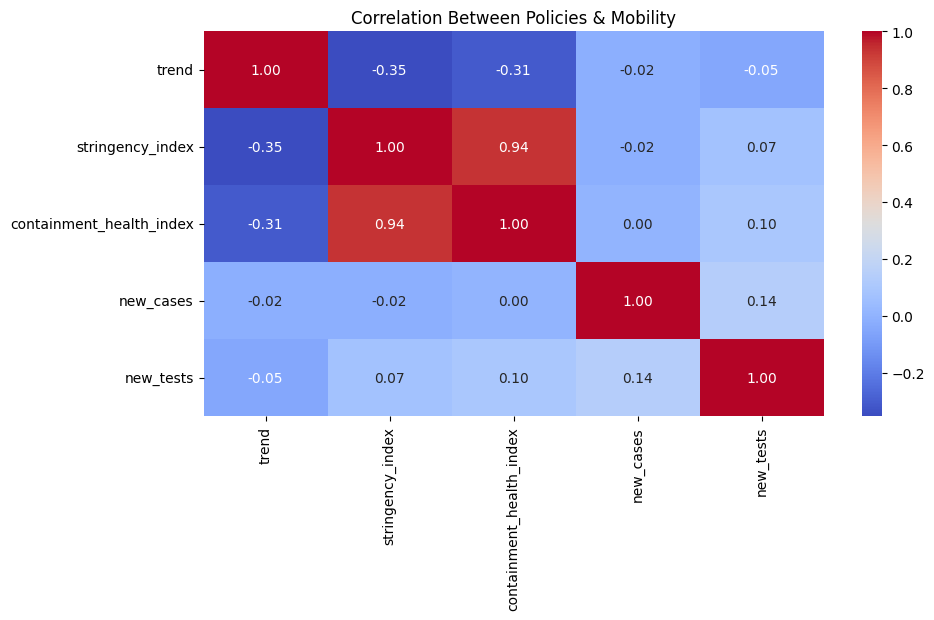

In [6]:
# Helps quantify the relationship between lockdowns, cases, and mobility.
policy_cols = ["trend", "stringency_index", "containment_health_index", "new_cases", "new_tests"]
correlation_matrix = merged_df[policy_cols].corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Policies & Mobility")
plt.show()

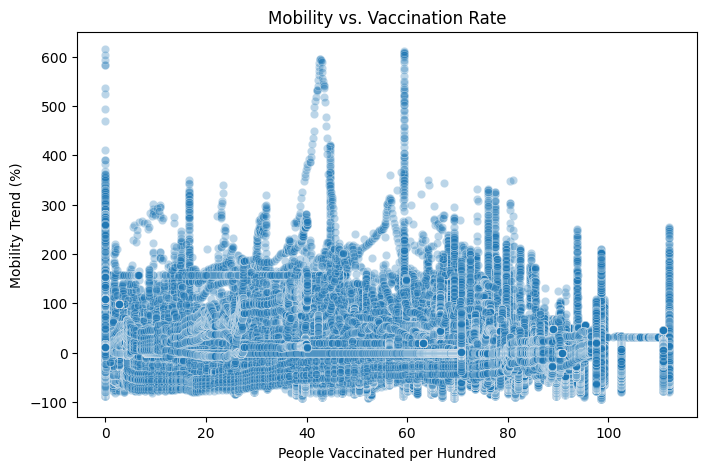

In [7]:
# Helps analyze if higher vaccination led to more movement.
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x="people_vaccinated_per_hundred", y="trend", alpha=0.3)
plt.title("Mobility vs. Vaccination Rate")
plt.xlabel("People Vaccinated per Hundred")
plt.ylabel("Mobility Trend (%)")
plt.show()

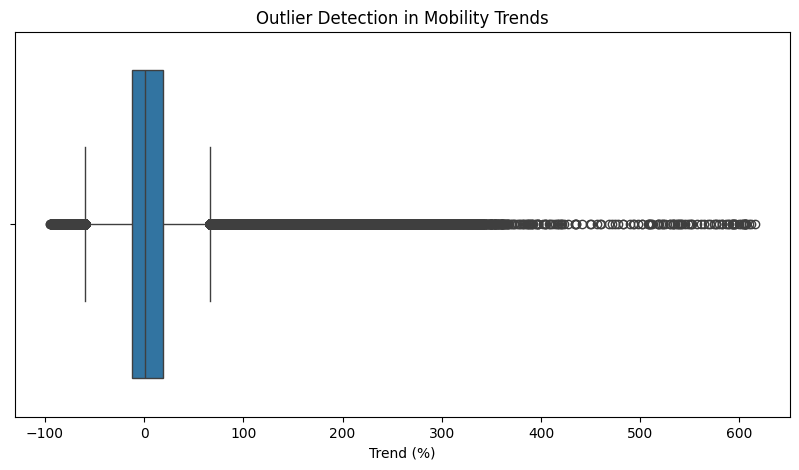

In [8]:
# Outliers may indicate policy changes, data errors, or major events.
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x="trend")
plt.title("Outlier Detection in Mobility Trends")
plt.xlabel("Trend (%)")
plt.show()

d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\MTech Courses\Sem 2\CS661\Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Rovish\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Rovish\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rovish\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456

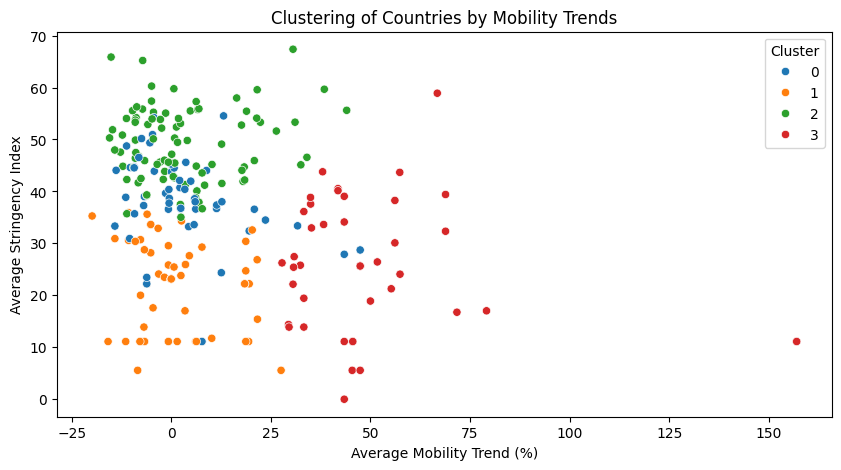

In [9]:
# Groups similar mobility response patterns across countries.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
df_cluster = merged_df.groupby("country")[["trend", "stringency_index", "new_cases_per_million"]].mean()
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

# Visualize
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_cluster, x="trend", y="stringency_index", hue="Cluster", palette="tab10")
plt.title("Clustering of Countries by Mobility Trends")
plt.xlabel("Average Mobility Trend (%)")
plt.ylabel("Average Stringency Index")
plt.show()

📌 Summary of All Essential Visualizations
Category	Visualization	Why It's Needed?
1. Distribution & Trends	Histogram of trend	Checks normality & extreme mobility changes
Line plot of mobility over time	Shows long-term mobility trends
2. Region & Country-Wise Analysis	Line plot by continent	Compares regional mobility changes
Box plot by country	Identifies countries with high variability
3. Policy & Pandemic Impact	Heatmap of mobility vs. policies	Checks lockdown/vaccination/testing effects
Scatter plot: Mobility vs. Vaccination	Checks if more vaccines increased movement
4. Outliers & Patterns	Box plot of mobility	Detects extreme values
K-Means Clustering of Countries	Groups countries with similar mobility patterns